<a href="https://colab.research.google.com/github/albarcel/Entregable-2/blob/master/Entregable3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carga de librerías

Comenzamos cargando las librerías que vamos a necesitar en esta práctica. La librería ``fastai`` nos proporciona los distintos algoritmos de aprendizaje profundo y la librería ``os`` la utilizamos para la gestión de ficheros. 

In [0]:
import os
from google.colab import files
from fastai.vision import *

## Creando nuestro dataset de imágenes

El primer paso en cualquier proyecto de clasificación de imágenes es construir un dataset de imágenes anotadas. Aunque existen muchos datasets disponibles vamos a ver que con las técnicas explicadas en este notebook se pueden construir buenos modelos de clasificación para cualquier problema. 

En concreto, nuestro objetivo va a ser construir un modelo capaz de distinguir entre los personajes de la serie [Padre_De_Familia](https://es.wikipedia.org/wiki/Padre_De_Familia). En concreto queremos saber si quien aparece en una imagen es Peter, Stewie y Meg.


### Creando el dataset

Para crear nuestro dataset vamos a utilizar imágenes adquiridas desde Google Imágenes.


In [2]:
!wget https://raw.githubusercontent.com/albarcel/fotosEntre3/master/Meg.csv -O Meg.csv
!wget https://raw.githubusercontent.com/albarcel/fotosEntre3/master/Peter.csv  -O Peter.csv
!wget https://raw.githubusercontent.com/albarcel/fotosEntre3/master/Stewie.csv  -O Stewie.csv

--2019-05-15 17:50:18--  https://raw.githubusercontent.com/albarcel/fotosEntre3/master/Meg.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11516 (11K) [text/plain]
Saving to: ‘Meg.csv’

Meg.csv             100%[===================>]  11.25K  --.-KB/s    in 0s      

2019-05-15 17:50:23 (121 MB/s) - ‘Meg.csv’ saved [11516/11516]

--2019-05-15 17:50:24--  https://raw.githubusercontent.com/albarcel/fotosEntre3/master/Peter.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10620 (10K) [text/plain]
Saving to: ‘Peter.csv’

Peter.csv        

### Descargando las imágenes y organizando las carpetas

Vamos a crear las carpetas y después descargamos las imágenes.

In [3]:
folder = 'Peter'
file = 'Peter.csv'
path = Path('data/padre')
dest = path/folder
dest.mkdir(parents=True,exist_ok=True)
os.rename(file,path/file)
# Como mucho descargamos 200 imágenes
download_images(path/file,dest,max_pics=200)

Error https://www.washingtonpost.com/pbox.php?url=http://i1024.photobucket.com/albums/y304/dpk0802/bridgegatejpg-fc34a3e7a3da8841_zpsbc98abfe.jpg&w=1484&op=resize&opt=1&filter=antialias&t=20170517 HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)


In [4]:
folder = 'Stewie'
file = 'Stewie.csv'
path = Path('data/padre')
dest = path/folder
dest.mkdir(parents=True,exist_ok=True)
os.rename(file,path/file)
# Como mucho descargamos 200 imágenes
download_images(path/file,dest,max_pics=200)

Error https://i2.lisimg.com/13182732/411full.jpg HTTPSConnectionPool(host='i2.lisimg.com', port=443): Max retries exceeded with url: /13182732/411full.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'),))


In [5]:
folder = 'Meg'
file = 'Meg.csv'
path = Path('data/padre')
dest = path/folder
dest.mkdir(parents=True,exist_ok=True)
os.rename(file,path/file)
# Como mucho descargamos 200 imágenes
download_images(path/file,dest,max_pics=200)

In [6]:
for c in ['Meg','Stewie','Peter']:
  print(c)
  verify_images(path/c,delete=True,max_size=500)

Meg


cannot identify image file <_io.BufferedReader name='data/padre/Meg/00000015.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/padre/Meg/00000070.jpg'>
cannot identify image file <_io.BufferedReader name='data/padre/Meg/00000072.jpg'>
cannot identify image file <_io.BufferedReader name='data/padre/Meg/00000062.png'>
Stewie


cannot identify image file <_io.BufferedReader name='data/padre/Stewie/00000066.jpg'>
cannot identify image file <_io.BufferedReader name='data/padre/Stewie/00000071.jpeg'>
cannot identify image file <_io.BufferedReader name='data/padre/Stewie/00000099.jpg'>
Peter


cannot identify image file <_io.BufferedReader name='data/padre/Peter/00000083.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/padre/Peter/00000044.jpg'>
cannot identify image file <_io.BufferedReader name='data/padre/Peter/00000092.png'>
cannot identify image file <_io.BufferedReader name='data/padre/Peter/00000007.jpg'>


### Mostrando imágenes del dataset

Vamos a ver alguna de las imágenes de nuestro dataset para ello vamos a utilizar la clase ``ImageDataBunch`` que sirve para cargar los datos de distinta maneras (en este caso, a partir de una organización de carpetas). 

Almacenaremos el dataset en la variable ``data``. De nuestro dataset de imágenes vamos a usar un 20% como dataset de validación (parámetro ``valid_pct``), se aplican también distintas técnicas de aumento (parámetro ``ds_tfms``, crea una nueva celda y ejecuta la instrucción ``get_transforms()`` para ver las técnicas de aumento que se están utilizando), las imágenes se reescalan a tamaño 224 (este es el tamaño de entrada que espera que tengan las imágenes la red neuronal que construiremos un poco más adelante), y se normalizan utilizando el dataset de ImageNet. 

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path,train=".",valid_pct=0.2,ds_tfms=get_transforms(),size=224,num_workers=4).normalize(imagenet_stats)

Mostramos un batch del dataset que acabamos de cargar. 

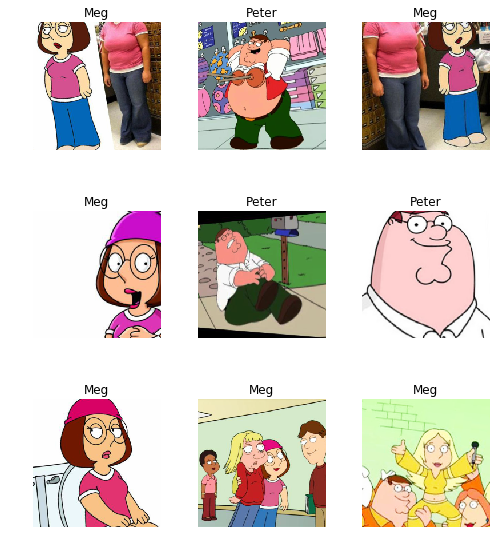

In [8]:
data.show_batch(rows=3,figsize=(7,8))

## Creando el modelo de predicción

A continuación vamos a crear nuestra red convolucional usando *transfer learning* y utilizando como base la arquitectura [ResNet 34](https://arxiv.org/abs/1512.03385); aunque existen otros [modelos disponibles](https://pytorch.org/docs/stable/torchvision/models.html) este modelo proporciona buenos resultados. Al crear nuestra red convolucional también debemos indicar la [métrica](https://docs.fast.ai/metrics.html#metrics) que vamos a utilizar para medir el rendimiento del modelo, en este caso vamos a usar el error_rate y la accuracy.

La primera vez que se ejecuta la siguiente instrucción puede llevar algún tiempo debido a que se tienen que descargar los pesos asociados a la red ResNet 34. 

In [9]:
learn = create_cnn(data,models.resnet34,metrics=[error_rate,accuracy])

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:05<00:00, 17020556.30it/s]


### Entrenando la red

El siguiente paso es entrenar la red. Para ello vamos a utilizar el [siguiente procedimiento](https://sgugger.github.io/the-1cycle-policy.html) basado en la idea de fine-tuning:

1. En primer lugar se dejan fijos (congelados) los pesos de la mayoría de capas de la red y sólo se actualizan los de las últimas capas. 
2. Se descongelan todas las capas de la red. 
3. Se reentrenan todas las capas de la red pero utilizando distintos *learning rates* en cada capa. 

La librería fastai proporciona toda la funcionalidad necesaria para llevar a cabo este proceso.

#### Actualizando los pesos de las últimas capas

Para llevar a cabo la actualización de pesos de las últimas capas hay que emplear la siguiente instrucción (**Importante.** Activar el uso de GPUs de lo contrario puede llevar demasiado tiempo este proceso).

In [10]:
learn.fit_one_cycle(4)

Con el proceso anterior conseguimos aproximandamente una accuracy del 80% (notar que el valor del error_rate y la accuracy están relacionados). Para empezar esta accuracy no está mal, pero podemos mejorarla. 

Vamos a guardar el estado de nuestra red con el siguiente comando.

In [0]:
learn.save('stage-1')

#### Descongelando la red

La instrucción para descongelar las capas de la red es la siguiente. 

In [0]:
learn.unfreeze()

#### Reentrenando las capas de la red

Una vez que hemos descongelado las capas de la red vamos a entrenarlas, pero vamos a usar distintos ratios de aprendizaje para las capas de la red. La idea es que para las capas del principio de la red vamos a utilizar un *learning rate* pequeño y para las últimas usaremos un *learning rate* algo más alto. 

Esto es debido a que las capas del principio de la red se encargan de codificar patrones básicos de las imágenes (como colores, bordes, etc.) que son aplicables a la mayoría de imágenes y por lo tanto no es necesario realizar grandes modificaciones en los pesos de esas capas. Por el contrario las últimas capas de la red son más específicas y dependen del problema con el que estemos tratando por lo que los pasos de aprendizaje pueden ser algo mayores. 

Para una explicación detallada de cómo encontrar el valor adecuado del learning rate puedes ver el [blog de Sylvain Gugger](https://sgugger.github.io/how-do-you-find-a-good-learning-rate.html) o la [documentación de fastai](https://docs.fast.ai/callbacks.lr_finder.html#LRFinder). En general, unos valores que suelen proporcionar buenos resultados son los utilizados en la siguiente instrucción:

In [13]:
learn.fit_one_cycle(4,max_lr=slice(3e-5,3e-4))

Con el proceso anterior somos capaces de mejorar de manera considerable el rendimiento del modelo. Antes de seguir entrenando por más tiempo es conveniente realizar un análisis de los resultados. Pero antes de pasar a ese paso vamos a guardar el estado de nuestra red. 

In [0]:
learn.save('stage-2')

## Interpretación de los resultados

Vamos a interpretar los resultados utilizando la matriz de confusión. Para ello comenzamos cargando el estado anterior de la red. 

In [15]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (226 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Peter,Peter,Peter,Peter,Peter
Path: data/padre;

Valid: LabelList (56 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Peter,Meg,Meg,Meg,Stewie
Path: data/padre;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tru

A continuación se crear una interpretación de los resultados obtenidos con la misma.

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

Por último mostramos la matriz de confusión obtenida.

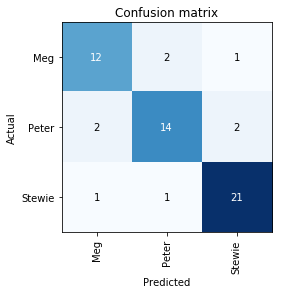

In [17]:
interp.plot_confusion_matrix()

Como podemos ver en la matriz de confusión anterior, el modelo tiende a confundir a Stewie con Peter, Meg con Peter... Esto puede deberse a que tengamos cierto ruido en nuestras imágenes (por ejemplo, imágenes que contengan a ambos personajes). Por lo tanto es conveniente limpiar nuestro dataset.

In [0]:
from fastai.widgets import *

En primer lugar debemos encontrar los paths de las imágenes que tienen una mayor pérdida (es decir, aquellas que el modelo clasifica peor). Esto se puede hacer con .from_toplosses.

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn,ds_type=DatasetType.Valid)

In [21]:
ds.to_df().iloc[idxs[:10]]

x       y
90      Meg/00000091.jpg     Meg
13    Peter/00000085.jpg   Peter
109     Meg/00000092.jpg     Meg
97      Meg/00000053.jpg     Meg
10    Peter/00000098.jpg   Peter
60    Peter/00000004.jpg   Peter
223  Stewie/00000046.jpg  Stewie
102     Meg/00000041.jpg     Meg
89      Meg/00000045.jpg     Meg
23    Peter/00000066.jpg   Peter

Vamos a mostrar las diez primeras imágenes de la lista.

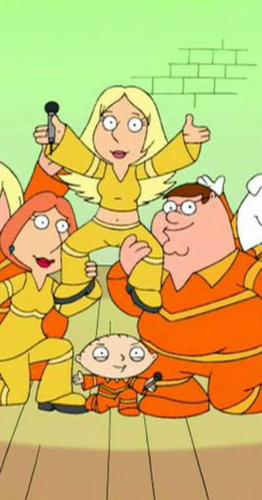

In [23]:
img = open_image(path/'Meg'/'00000091.jpg')
img

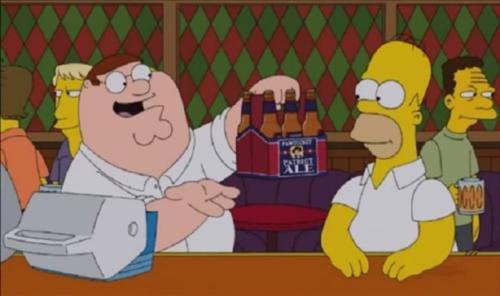

In [24]:
img = open_image(path/'Peter'/'00000085.jpg')
img

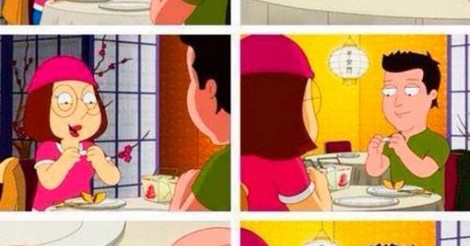

In [25]:
img = open_image(path/'Meg'/'00000092.jpg')
img

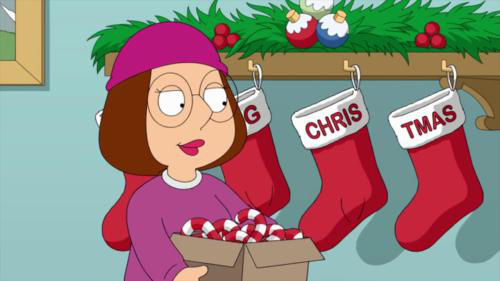

In [26]:
img = open_image(path/'Meg'/'00000053.jpg')
img

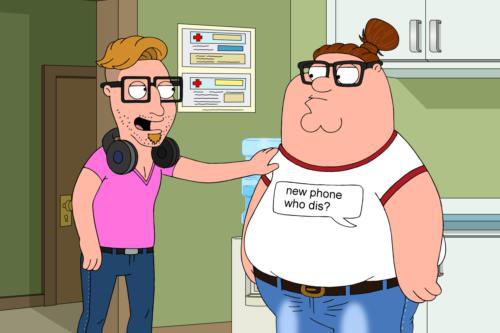

In [27]:
img = open_image(path/'Peter'/'00000098.jpg')
img

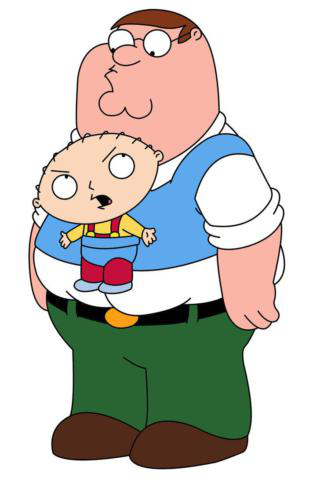

In [28]:
img = open_image(path/'Peter'/'00000004.jpg')
img

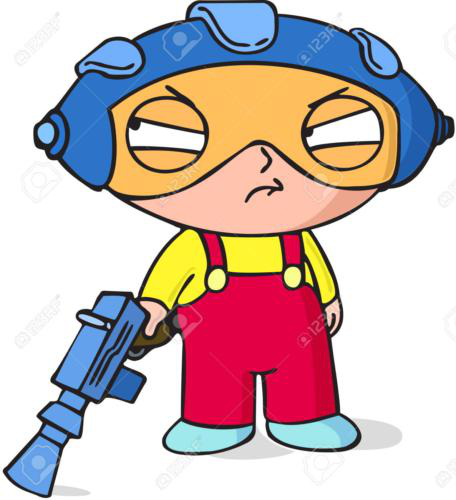

In [29]:
img = open_image(path/'Stewie'/'00000046.jpg')
img

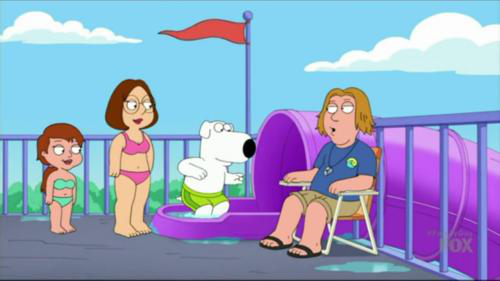

In [30]:
img = open_image(path/'Meg'/'00000041.jpg')
img

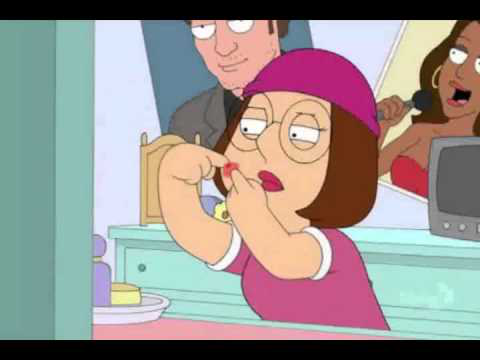

In [31]:
img = open_image(path/'Meg'/'00000045.jpg')
img

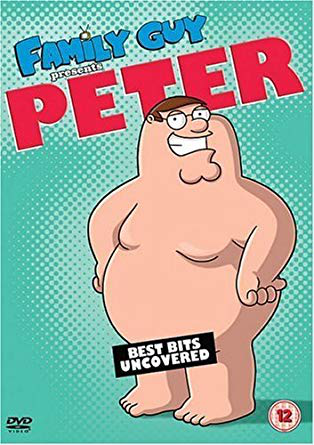

In [32]:
img = open_image(path/'Peter'/'00000066.jpg')
img

## **Limpiando Dataset Ampliación**

Como se puede apreciar hay alguna que otra imagen que puede crear confusión porque salen dos de los personajes y por eso clasificaría mal el modelo. Por lo tanto, vamos a limpiar el dataset de las imagenes que hemos visto que había fallo, en nuestro caso ha sido solamente de una.

In [0]:
import os

In [0]:
os.remove(path/'Peter'/'00000004.jpg')

In [57]:
img = open_image(path/'Peter'/'00000004.jpg')
img

FileNotFoundError: ignored

Asi podremos borrar las imágenes que esten mal clasificadas de una manera fácil y sencilla.

## Poniendo el modelo en producción

Lo último que vamos a ver es cómo se puede poner el modelo en producción para usarlo para predecir la categoría de nuevas imágenes. 

Lo primero debemos exportar el modelo. La siguiente instrucción crea un fichero llamado 'export.pkl' en el directorio donde estamos trabajando (está almacenado en la variable ``path``) que sirve para desplegar el modelo. 

In [0]:
learn.export()

Podemos ver que se ha creado dicho fichero.

In [34]:
!ls data/padre

export.pkl  Meg  Meg.csv  models  Peter  Peter.csv  Stewie  Stewie.csv


A continuación indicamos al sistema que use la CPU para el proceso de inferencia (en caso de que el ordenador donde se despliega el modelo no tenga una GPU esto ocurre de manera automática).

In [0]:
defaults.device = torch.device('cpu')

Vamos a probar nuestro modelo con una nueva imagen, en este caso de Peter. Comenzamos descargando dicha imagen, y a continuación la abrimos.

In [36]:
!wget https://img.culturacolectiva.com/content/2016/02/9.jpg?_ga=2.213478737.412111799.1557944597-670497405.1557944597 -O Peter.jpg

--2019-05-15 18:24:18--  https://img.culturacolectiva.com/content/2016/02/9.jpg?_ga=2.213478737.412111799.1557944597-670497405.1557944597
Resolving img.culturacolectiva.com (img.culturacolectiva.com)... 104.16.183.15, 104.16.35.67, 2606:4700::6810:b70f, ...
Connecting to img.culturacolectiva.com (img.culturacolectiva.com)|104.16.183.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116213 (113K) [image/jpeg]
Saving to: ‘Peter.jpg’

Peter.jpg           100%[===================>] 113.49K  --.-KB/s    in 0.1s    

2019-05-15 18:24:18 (1.00 MB/s) - ‘Peter.jpg’ saved [116213/116213]



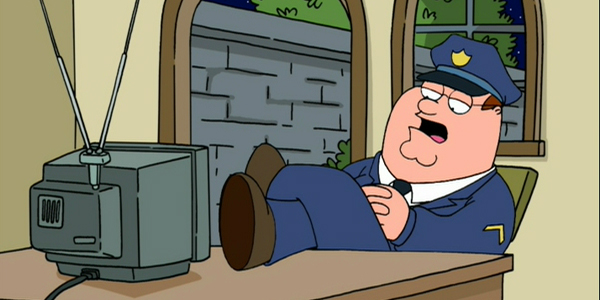

In [37]:
img = open_image('Peter.jpg')
img

A continuación creamos nuestro Learner.

In [0]:
learn = load_learner(path)

Y por último realizamos la predicción.

In [39]:
pred_class,pred_idx,outputs=learn.predict(img)
pred_class

Category Peter

Ahora voy a probar con otro personajes para ver si van todos bien.

In [41]:
!wget https://img.suggest.com/filter:scale/slides/3/2/2/4/1/6/3224166924/45ffa9f4c94821b9c0a33431f9264ca4b32bb427.jpeg?mw=615 -O Meg.jpg

--2019-05-15 18:30:01--  https://img.suggest.com/filter:scale/slides/3/2/2/4/1/6/3224166924/45ffa9f4c94821b9c0a33431f9264ca4b32bb427.jpeg?mw=615
Resolving img.suggest.com (img.suggest.com)... 104.17.39.81, 104.17.40.81
Connecting to img.suggest.com (img.suggest.com)|104.17.39.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50323 (49K) [image/jpeg]
Saving to: ‘Meg.jpg’

Meg.jpg             100%[===================>]  49.14K  --.-KB/s    in 0.01s   

2019-05-15 18:30:01 (3.86 MB/s) - ‘Meg.jpg’ saved [50323/50323]



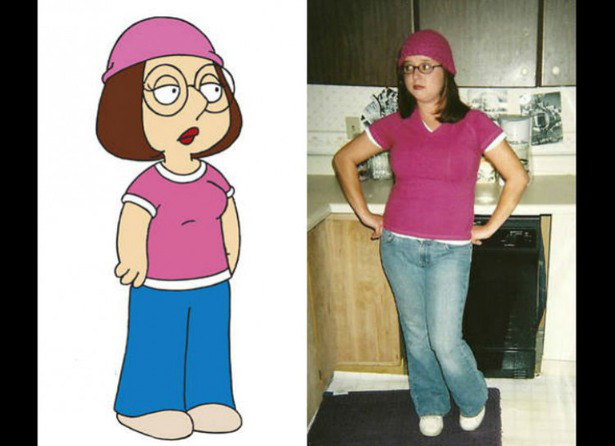

In [42]:
img = open_image('Meg.jpg')
img

In [0]:
learn = load_learner(path)

In [44]:
pred_class,pred_idx,outputs=learn.predict(img)
pred_class

Category Meg

In [45]:
!wget https://images-na.ssl-images-amazon.com/images/I/41QMIXYGVqL._SX355_.jpg -O Stewie.jpg

--2019-05-15 18:35:15--  https://images-na.ssl-images-amazon.com/images/I/41QMIXYGVqL._SX355_.jpg
Resolving images-na.ssl-images-amazon.com (images-na.ssl-images-amazon.com)... 99.84.246.106
Connecting to images-na.ssl-images-amazon.com (images-na.ssl-images-amazon.com)|99.84.246.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15785 (15K) [image/jpeg]
Saving to: ‘Stewie.jpg’

Stewie.jpg          100%[===================>]  15.42K  --.-KB/s    in 0s      

2019-05-15 18:35:15 (366 MB/s) - ‘Stewie.jpg’ saved [15785/15785]



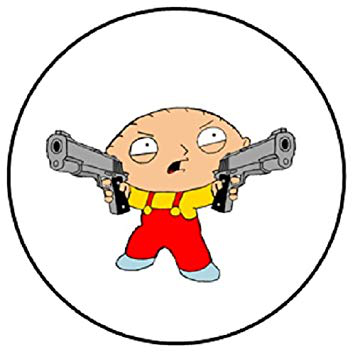

In [49]:
img = open_image('Stewie.jpg')
img

In [0]:
learn = load_learner(path)

In [51]:
pred_class,pred_idx,outputs=learn.predict(img)
pred_class

Category Stewie

Como podemos comprobar nos va bien para los ejemplos que hemos elegido.